In [2]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from IPython import display

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


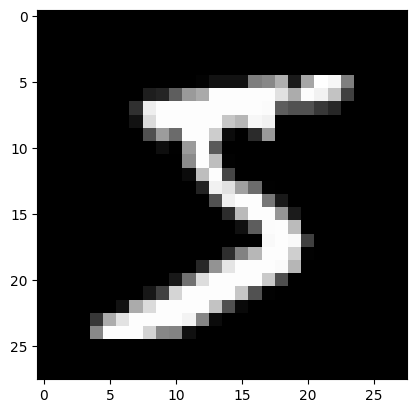

In [4]:
plt.imshow(X_train[0], cmap="gray")

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [6]:
X_train = X_train * 1 / 255

In [7]:
X_train = tf.expand_dims(X_train, axis=-1)

In [8]:
BATCH_SIZE = 256

In [9]:
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(len(X_train)).batch(BATCH_SIZE)

In [10]:
noise_dim = 100

generator = tf.keras.Sequential([
  tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(noise_dim,)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(),
  tf.keras.layers.Reshape((7,7, 256)),
  tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False), # does not change the shape because of the stride of 1
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(),
  tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False), # multiplies width and height by 2 thanks to stride 2
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.LeakyReLU(),
  tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation="sigmoid") # multiplies width and height by 2 thanks to stride 2
  ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         294,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             576 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,674,560 (6.39 MB)

 Trainable params: 1,649,088 (6.29 MB)

 Non-trainable params: 25,472 (99.50 KB)

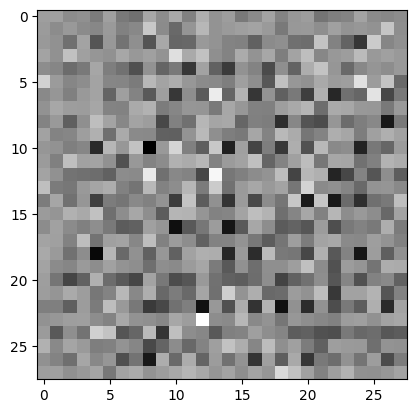

In [12]:
### Random pixel size creation (1, 100)
random_pixels = tf.random.normal([1,100])

### Model application
rand_img = generator(random_pixels, training=False)

### Model visualisation
plt.imshow(rand_img.numpy().squeeze(), cmap="gray")

In [13]:
discriminator = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2), padding='same', input_shape=[28, 28, 1]),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2D(128, (3, 3), strides=(2,2), padding="same"),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# let's create a tensor
t = tf.constant([[1,2],[3,4]])
print("original tensor:", t)

ones = tf.ones_like(t)
print("\n ones like:", ones)

zeros = tf.zeros_like(t)
print("\n zeros like:", zeros)

original tensor: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)

 ones like: tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)

 zeros like: tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)


In [15]:
bce = tf.keras.losses.BinaryCrossentropy()

# It can be useful to add some noise on the labels asociated with the real outputs
# and fake outputs. This serves multiple purposes:
# We do not want the discriminator to learn to detect the real images too quickly
# otherwise the generator will not be able to learn.
# It may also be useful to add noise to the fake labels for the same reason
# This is called label smoothing and may serve as regularization for the GAN's
# training process, leading to more stable results

def discriminator_loss(real_outputs, fake_outputs):
  real_label = tf.ones_like(real_outputs) - 0.05 * tf.random.uniform(shape=real_outputs.shape)
  real_loss = bce(real_label, real_outputs) # for real data disc is expected to predict 1
  fake_label = tf.zeros_like(fake_outputs) + 0.05 * tf.random.uniform(shape=fake_outputs.shape)
  fake_loss = bce(fake_label, fake_outputs) # for fake data disc is expected to predict 0

  total_loss = real_loss + fake_loss # the disc loss is the sum of those two losses
  # ability to catch the fake + ability to clear the real data
  return total_loss

In [16]:
# We do use label smoothing for the generator model because we want it to perform
# as good as possible.
def generator_loss(fake_outputs):
  return bce(tf.ones_like(fake_outputs), fake_outputs) # gen wants disc to think fake data is real (predicted as 1)

In [17]:
generator_optimizer = tf.keras.optimizers.Adam()
discriminator_optimizer = tf.keras.optimizers.Adam()

In [18]:
dataset_example = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(len(X_train)).batch(BATCH_SIZE)

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(128,3,padding="same",input_shape=[X_train.shape[1],X_train.shape[2],1], activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Conv2D(64,3,padding="same", activation="relu"),
                             tf.keras.layers.MaxPool2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10, activation="softmax")
])

opt = tf.keras.optimizers.Adam()

loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

def train_step_example(image_batch, target_batch):
  # this function will tape the gradient inside this
  with tf.GradientTape() as tape:
    output = model(image_batch) # compute the output
    loss = loss_function(target_batch, output) # compute the loss
    grads = tape.gradient(loss, model.trainable_variables) # calculate the gradient
    # of the loss along the variables we want to update, we may choose other things
    # than the trainable variables of the model, we can calculate the gradient
    # for any set of variables that influence the loss function, we could for example
    # calculate the gradient along the input values
    opt.apply_gradients(zip(grads, model.trainable_variables)) # use the optimizer
    # to update the variables thanks to the gradient
  return loss

# Training loop
epochs = 1
steps_per_epoch = 10
for epoch in range(epochs):
  for step in range(steps_per_epoch):
    image, target = next(iter(dataset_example))
    loss = train_step_example(image,target)
    print(loss)

tf.Tensor(2.3085933, shape=(), dtype=float32)
tf.Tensor(2.2692297, shape=(), dtype=float32)
tf.Tensor(2.2377884, shape=(), dtype=float32)
tf.Tensor(2.1831884, shape=(), dtype=float32)
tf.Tensor(2.1526499, shape=(), dtype=float32)
tf.Tensor(2.0652068, shape=(), dtype=float32)
tf.Tensor(2.0215433, shape=(), dtype=float32)
tf.Tensor(1.9236828, shape=(), dtype=float32)
tf.Tensor(1.8282468, shape=(), dtype=float32)
tf.Tensor(1.6908948, shape=(), dtype=float32)


In [19]:
def train_step(images): # the function takes a batch of images as argument
    noise = tf.random.normal([BATCH_SIZE, noise_dim]) # generate a batch of noise

    # The GradientTape class is able to monitor and record the gradient of a given
    # tensorflow function, we will use it here to calculate the gradients of our
    # loss functions
    # We will need a tape for each of the models
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True) # generate a batch of fake data
      # the training=True argument is for the batch normalization

      real_output = discriminator(images, training=True) # compute the real outputs from the real data
      fake_output = discriminator(generated_images, training=True) # compute the fake outputs from the fake data

      gen_loss = generator_loss(fake_output) # compute the generator loss
      disc_loss = discriminator_loss(real_output, fake_output) # compute the discriminator loss

      # the tf.GradientTape() .gradient(value, variables) method will calculate the gradient
      # of a given function at point "value" according to "variables", note that this
      # works because we built everything with tensorflow functions
      gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
      gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

      # the tf.keras.optimizer .apply_gradients(zip(grad,variables)) method updates the
      # variables by running variables = variables - learning_rate * grad
      generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
      discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [20]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 255, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [21]:
# Generate the fixed generated examples
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

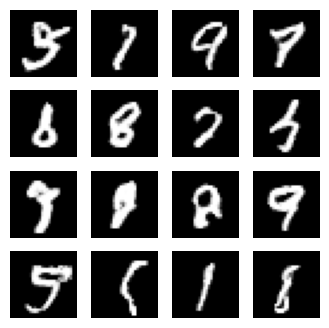

In [22]:
EPOCHS = 100

# loop over the number of epochs that we want to run
for epoch in range(EPOCHS):
  start = time.time()

  # loop over each batch in the source dataset
  for image_batch in dataset:
    # Run a training step to update the parameters in both models
    train_step(image_batch)

  # Remove the previous image
  display.clear_output(wait=True)
  # Displays the new generated image
  generate_and_save_images(generator,
                           epoch + 1,
                           seed)

  print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

# Génère la toute dernière image
display.clear_output(wait=True)
generate_and_save_images(generator,
                         EPOCHS,
                         seed)